In [219]:
import os
import re
import csv
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_prominences,find_peaks_cwt
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import sparta.Statistics as stat

In [131]:
# loading times

delCep_times = pd.read_csv('./results_mixed/delCep/delCep_Hermes_spectra_times.csv').times.astype('float32')
alfUMi_times = pd.read_csv('./results_mixed/alfUMi/alfUMi_Hermes_spectra_times.csv').times.astype('float32')
RRLyr_times = pd.read_csv('./results_mixed/RRLyr/RRLyr_Hermes_spectra_times.csv').times.astype('float32')
SZCas_times = pd.read_csv('./results_mixed/SZCas/SZCas_Hermes_times.csv').times.astype('float32')
SZTau_times = pd.read_csv('./results_mixed/SZTau/SZTau_Hermes_times.csv').times.astype('float32')
TUCas_times = pd.read_csv('./results_mixed/TUCas/TUCas_Hermes_spectra_times.csv').times.astype('float32')
V1154_times = pd.read_csv('./results_mixed/V1154/V1154Cyg_Hermes_spectra_times.csv').times.astype('float32')
zetGem_times = pd.read_csv('./results_mixed/zetGem/zetGem_Hermes_spectra_times.csv').times.astype('float32')

times = [delCep_times,alfUMi_times,RRLyr_times,SZCas_times,SZTau_times,TUCas_times,V1154_times,zetGem_times]

In [2]:
delCep_results = []
alfUMi_results = []
RRLyr_results = []
SZCas_results = []
SZTau_results = []
TUCas_results = []
V1154_results = []
zetGem_results = []

for filename in os.listdir('./results_mixed/delCep/'):
    delCep_results.append(stat.open_csv('./results_mixed/delCep/'+filename))
for filename in os.listdir('./results_mixed/alfUMi/'):
    alfUMi_results.append(stat.open_csv('./results_mixed/alfUMi/'+filename))
for filename in os.listdir('./results_mixed/RRLyr/'):
    RRLyr_results.append(stat.open_csv('./results_mixed/RRLyr/'+filename))
for filename in os.listdir('./results_mixed/SZCas/'):
    SZCas_results.append(stat.open_csv('./results_mixed/SZCas/'+filename))
for filename in os.listdir('./results_mixed/SZTau/'):
    SZTau_results.append(stat.open_csv('./results_mixed/SZTau/'+filename))
for filename in os.listdir('./results_mixed/TUCas/'):
    TUCas_results.append(stat.open_csv('./results_mixed/TUCas/'+filename))
for filename in os.listdir('./results_mixed/V1154/'):
    V1154_results.append(stat.open_csv('./results_mixed/V1154/'+filename))
for filename in os.listdir('./results_mixed/zetGem/'):
    zetGem_results.append(stat.open_csv('./results_mixed/zetGem/'+filename))

In [ ]:
pvalue = [1e-3]
p_value_levels = []
for idx, time in enumerate(times):
    pvalue_level = stat.calc_pdc_pval(time, pvalue, inverse_sf=True)
    p_value_levels.append(pvalue_level[0])

In [184]:
plt.style.use('sparta')

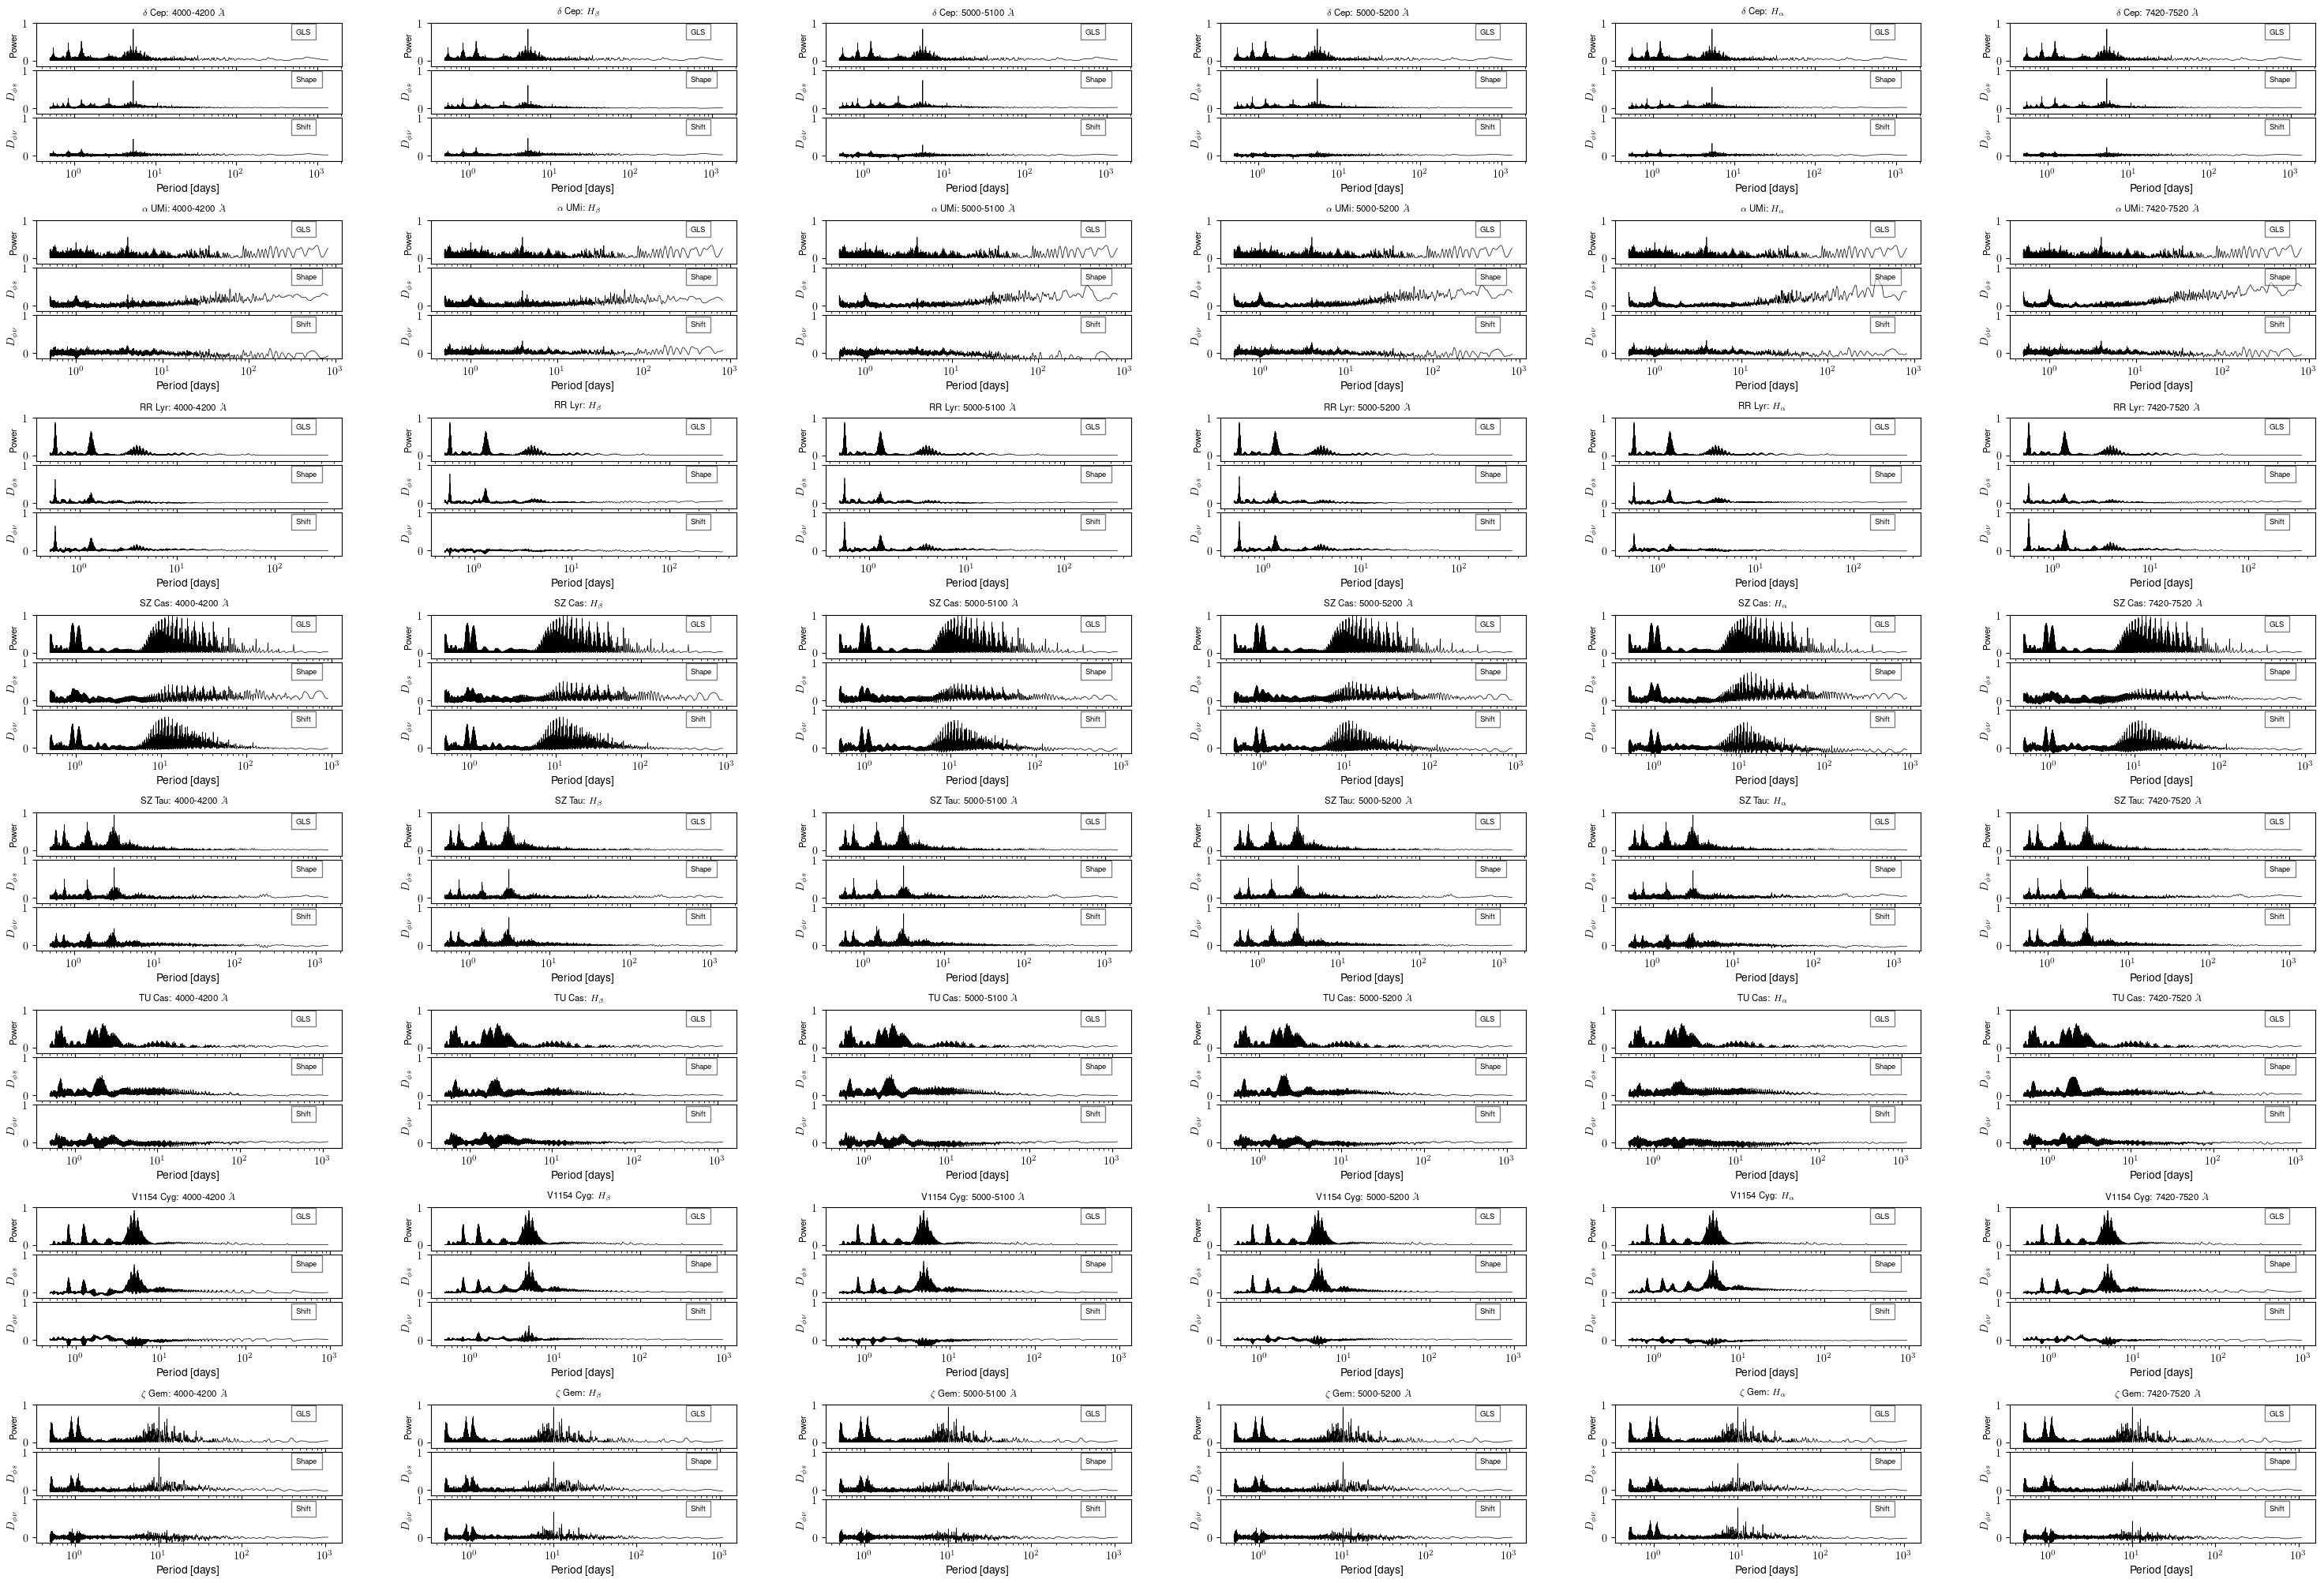

In [4]:
range_size = [r'4000-4200 $\AA$',r'$H_{\beta}$',r'5000-5100 $\AA$',r'5000-5200 $\AA$',r'$H_{\alpha}$',r'7420-7520 $\AA$']
all_results = [delCep_results,alfUMi_results,RRLyr_results,SZCas_results,SZTau_results,TUCas_results,V1154_results,zetGem_results]
fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'delcep')

subfigs = fig.subfigures(8, 6)
for outerind, subfig in enumerate(subfigs.flat):
    if 0<=outerind<=5:
        results = all_results[0]
        star = r'$\delta$ Cep'
    elif 6<=outerind<=11:
        results = all_results[1]
        star = r'$\alpha$ UMi'
    elif 12<=outerind<=17:
        results = all_results[2]
        star = r'RR Lyr'
    elif 18<=outerind<=23:
        results = all_results[3]
        star = r'SZ Cas'
    elif 24<=outerind<=29:
        results = all_results[4]
        star = r'SZ Tau'
    elif 30<=outerind<=35:
        results = all_results[5]
        star = r'TU Cas'
    elif 36<=outerind<=41:
        results = all_results[6]
        star = r'V1154 Cyg'
    elif 42<=outerind<=47:
        results = all_results[7]
        star = r'$\zeta$ Gem'
    axs = subfig.subplots(3,1,sharex=True,sharey = True)
    subfig.suptitle(star+': ' +str(range_size[outerind%6]), fontsize='small')
    for innerind, ax in enumerate(axs.flat):
        #put semilog(x)
        if innerind==0:
            ax.plot(results[outerind%6]['period'], results[outerind%6]['gls'],linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel('Power', fontsize='small')
        elif innerind==1:
            ax.plot(results[outerind%6]['period'], results[outerind%6]['shape'],linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel(r'$D_{\phi s}$')
        elif innerind==2:
            ax.plot(results[outerind%6]['period'],results[outerind%6]['shift'],linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel(r'$D_{\phi \nu}$')
            ax.set_xlabel(r'Period [days]')
        ax.set_ylim(-0.15,1)
        text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
        ax.text(0.85, 0.75, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5),fontsize = 'x-small')
plt.subplots_adjust(top=0.9, hspace=0.1, wspace=0.2,bottom=0.2)
plt.savefig('all_Hermes.pdf')
plt.show()

### Finding the main peak and its harmonics

In [180]:
def get_peaks(period, power, height, distance=5):
    peaks, peaks_height = find_peaks(power, height=height, distance=distance)
    peaks_period = period[peaks]
    #sort by height
    sorted_height = np.argsort(peaks_height['peak_heights'])[::-1]
    peaks_period = peaks_period[sorted_height]
    peaks_height = peaks_height['peak_heights'][sorted_height]
    return peaks_period, peaks_height
def get_main_peak(period, power, height, distance=5):
    peaks, peaks_height = find_peaks(power, height=height, distance=distance)
    peaks_period = period[peaks]
    if len(peaks_period)==0:
        return np.nan, np.nan
    #sort by height
    sorted_height = np.argsort(peaks_height['peak_heights'])[::-1]
    peaks_period = peaks_period[sorted_height]
    peaks_height = peaks_height['peak_heights'][sorted_height]
    return peaks_period[0], peaks_height[0]

In [182]:
delCep_peaks_gls = []
delCep_peaks_shape = []
delCep_peaks_shift = []
for result in delCep_results:
    delCep_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    delCep_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[0],distance=5))
    delCep_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[0],distance=5))
delCep_peaks = [delCep_peaks_gls,delCep_peaks_shape,delCep_peaks_shift]

alfUMi_peaks_gls = []
alfUMi_peaks_shape = []
alfUMi_peaks_shift = []
for result in alfUMi_results:
    alfUMi_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    alfUMi_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[1],distance=5))
    alfUMi_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[1],distance=5))
alfUMi_peaks = [alfUMi_peaks_gls,alfUMi_peaks_shape,alfUMi_peaks_shift]

RRLyr_peaks_gls = []
RRLyr_peaks_shape = []
RRLyr_peaks_shift = []
for result in RRLyr_results:
    RRLyr_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    RRLyr_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[2],distance=5))
    RRLyr_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[2],distance=5))
RRLyr_peaks = [RRLyr_peaks_gls,RRLyr_peaks_shape,RRLyr_peaks_shift]

SZCas_peaks_gls = []
SZCas_peaks_shape = []
SZCas_peaks_shift = []
for result in SZCas_results:
    SZCas_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    SZCas_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[3],distance=5))
    SZCas_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[3],distance=5))
SZCas_peaks = [SZCas_peaks_gls,SZCas_peaks_shape,SZCas_peaks_shift]

SZTau_peaks_gls = []
SZTau_peaks_shape = []
SZTau_peaks_shift = []
for result in SZTau_results:
    SZTau_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    SZTau_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[4],distance=5))
    SZTau_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[4],distance=5))
SZTau_peaks = [SZTau_peaks_gls,SZTau_peaks_shape,SZTau_peaks_shift]

TUCas_peaks_gls = []
TUCas_peaks_shape = []
TUCas_peaks_shift = []
for result in TUCas_results:
    TUCas_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    TUCas_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[5],distance=5))
    TUCas_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[5],distance=5))
TUCas_peaks = [TUCas_peaks_gls,TUCas_peaks_shape,TUCas_peaks_shift]

V1154_peaks_gls = []
V1154_peaks_shape = []
V1154_peaks_shift = []
for result in V1154_results:
    V1154_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    V1154_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[6],distance=5))
    V1154_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[6],distance=5))
V1154_peaks = [V1154_peaks_gls,V1154_peaks_shape,V1154_peaks_shift]

zetGem_peaks_gls = []
zetGem_peaks_shape = []
zetGem_peaks_shift = []
for result in zetGem_results:
    zetGem_peaks_gls.append(get_main_peak(result['period'],result['gls'],float(LombScargle(1/result['period'],result['gls']).false_alarm_level(pvalue[0], method = 'baluev')),distance=5))
    zetGem_peaks_shape.append(get_main_peak(result['period'],result['shape'],p_value_levels[7],distance=5))
    zetGem_peaks_shift.append(get_main_peak(result['period'],result['shift'],p_value_levels[7],distance=5))
zetGem_peaks = [zetGem_peaks_gls,zetGem_peaks_shape,zetGem_peaks_shift]

In [ ]:
stars = [r'delCep',r'alfUMi',r'RRLyr',r'SZCas',r'SZTau',r'TUCas',r'V1154Cyg',r'zetGem']
range_size = [r'4000_4200',r'Hbeta',r'5000_5100',r'5000_5200',r'Halpha',r'7420_7520']
all_peaks = [delCep_peaks,alfUMi_peaks,RRLyr_peaks,SZCas_peaks,SZTau_peaks,TUCas_peaks,V1154_peaks,zetGem_peaks]
#get the highest peak for each star and each range
delCep_main_peak = []
alfUMi_main_peak = []
RRLyr_main_peak = []
SZCas_main_peak = []
SZTau_main_peak = []
TUCas_main_peak = []
V1154_main_peak = []
zetGem_main_peak = []

for idx1,peaks in enumerate(all_peaks):
    for idx2,array in enumerate(peaks):
        main_peak_idx = np.argmax(array[1])
        main_peak_period = array[0][main_peak_idx]
        if idx1==0:
            delCep_main_peak.append(main_peak_period)
        elif idx1==1:
            alfUMi_main_peak.append(main_peak_period)
        elif idx1==2:
            RRLyr_main_peak.append(main_peak_period)
        elif idx1==3:
            SZCas_main_peak.append(main_peak_period)
        elif idx1==4:
            SZTau_main_peak.append(main_peak_period)
        elif idx1==5:
            TUCas_main_peak.append(main_peak_period)
        elif idx1==6:
            V1154_main_peak.append(main_peak_period)
        elif idx1==7:
            zetGem_main_peak.append(main_peak_period)
main_peaks = [delCep_main_peak,alfUMi_main_peak,RRLyr_main_peak,SZCas_main_peak,SZTau_main_peak,TUCas_main_peak,V1154_main_peak,zetGem_main_peak]

#store in a csv file
with open('Hermes_mixed_peaks.csv','w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['star','gls','shape','shift'])
    for idx,star in enumerate(stars):
        writer.writerow([star,main_peaks[idx][0],main_peaks[idx][1],main_peaks[idx][2]])    

c:\Users\kentb\miniconda3\envs\pdm\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


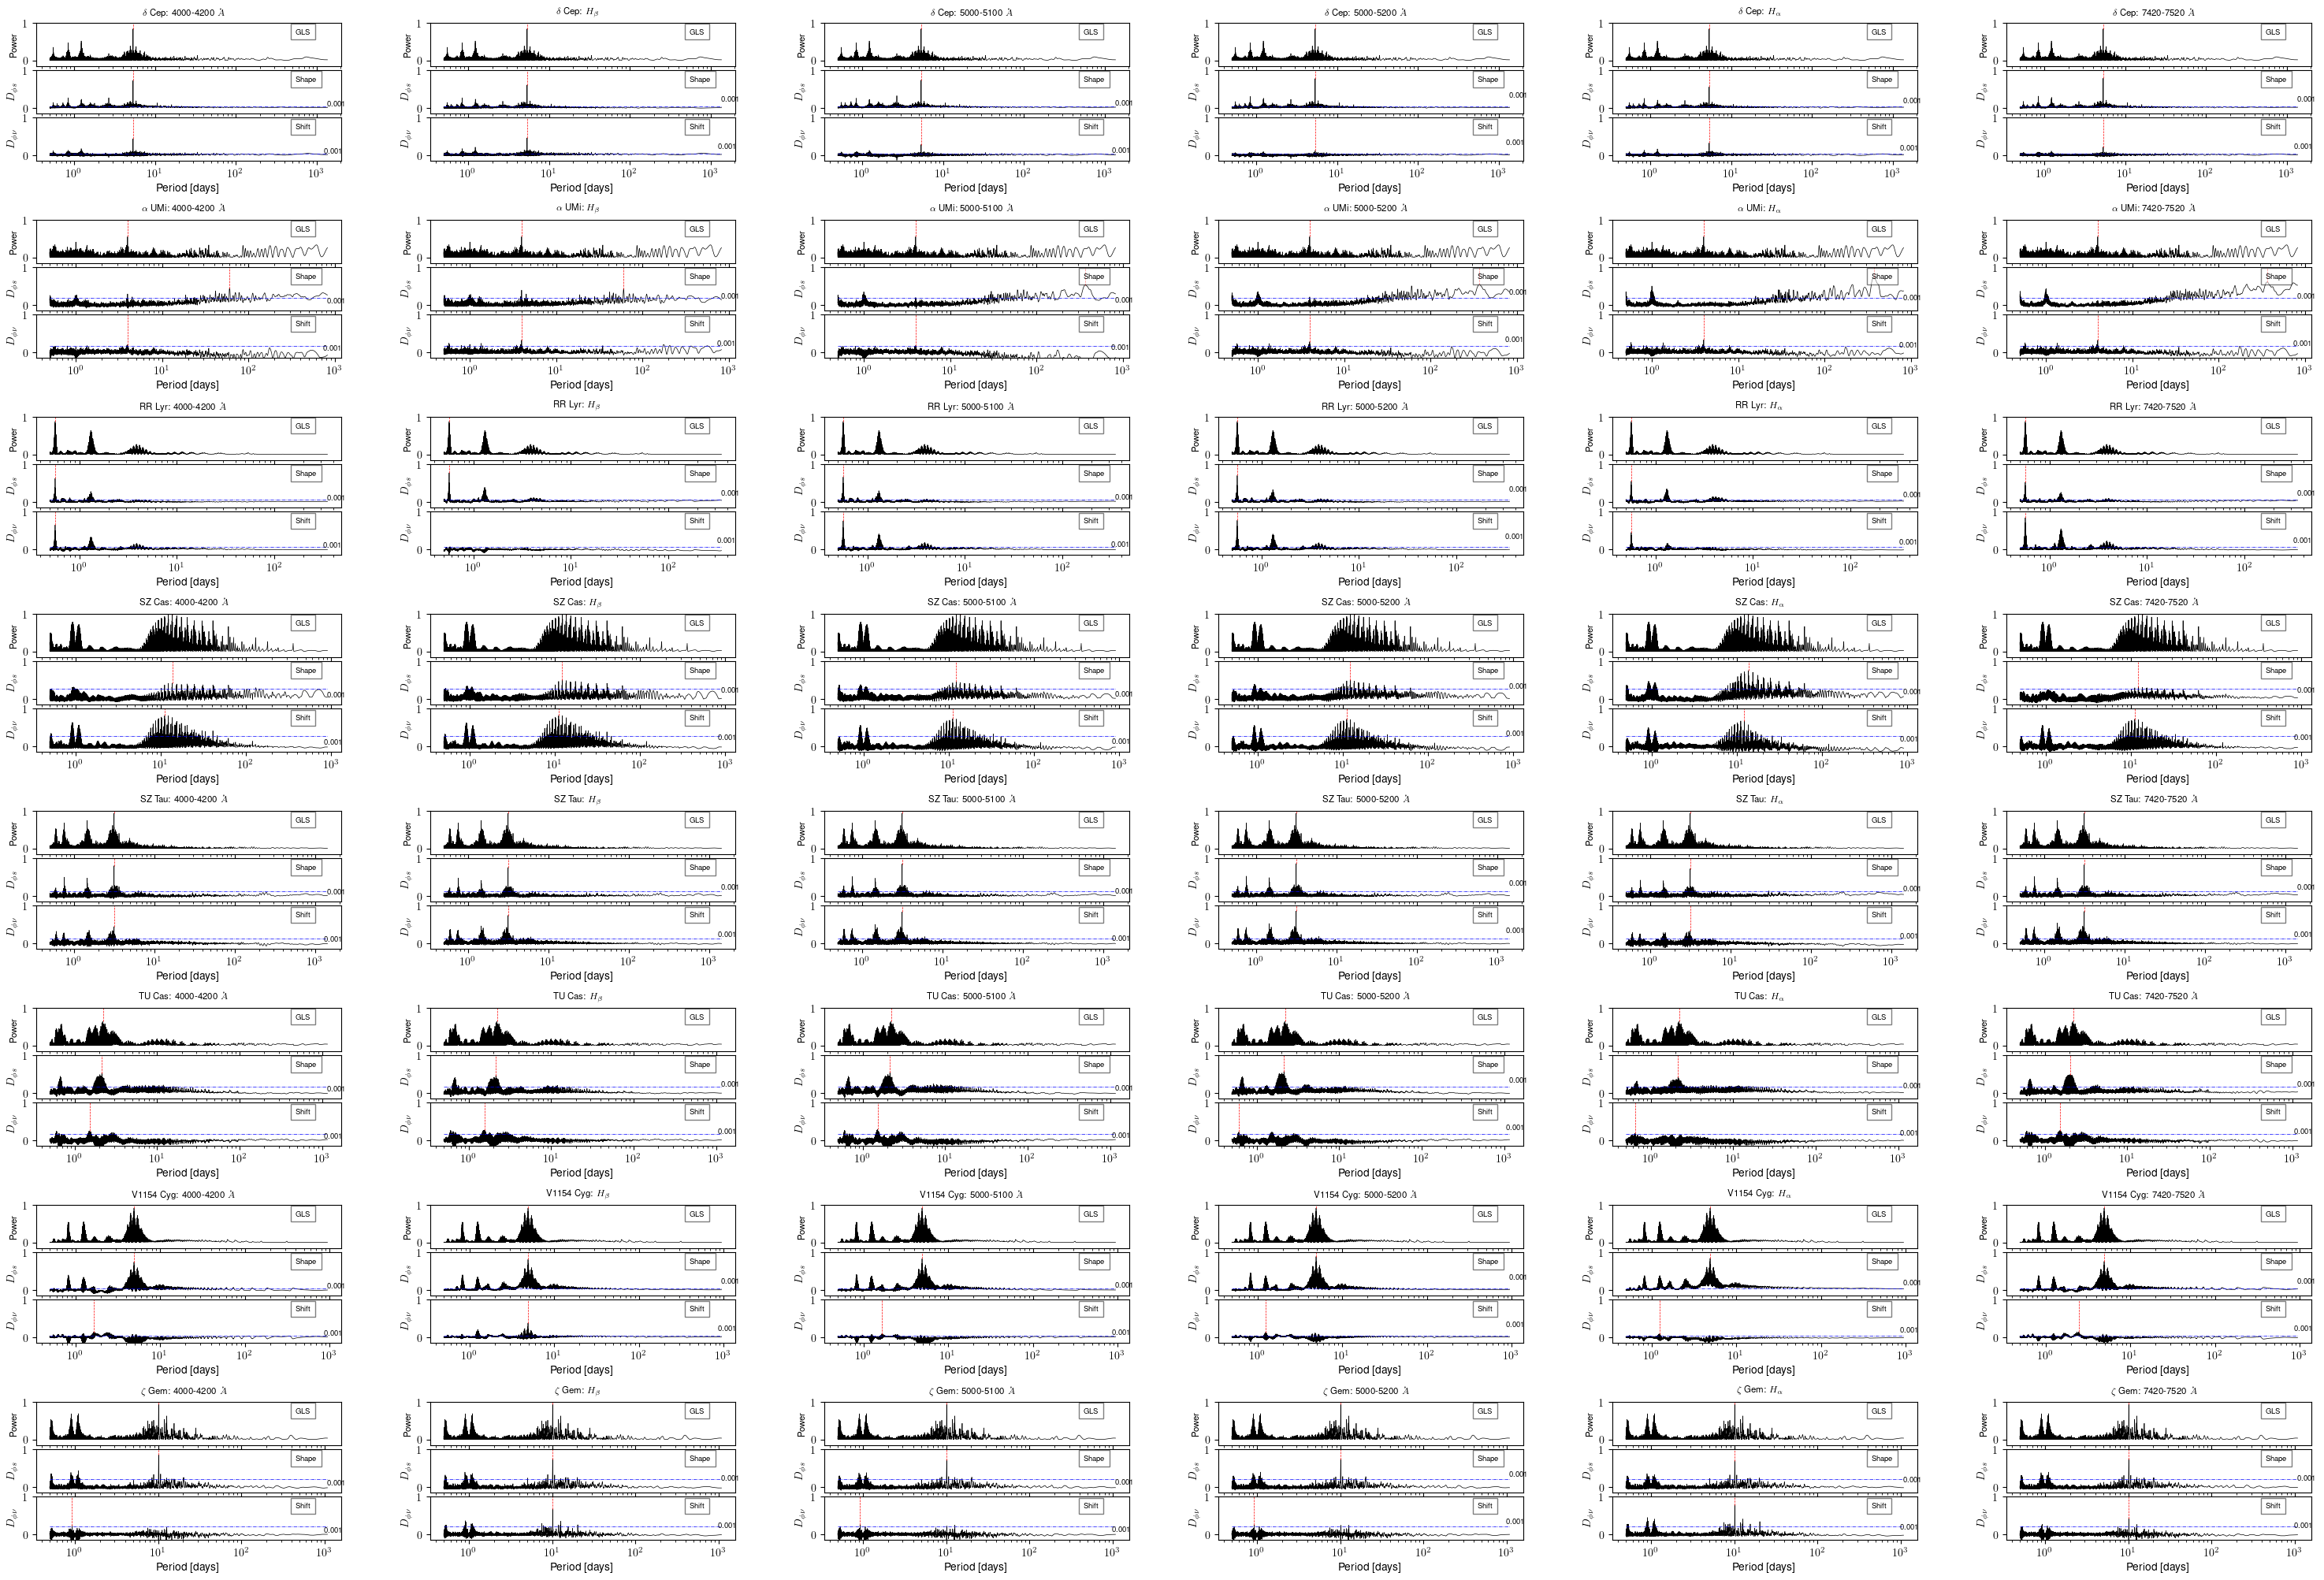

In [213]:
#plot all these peaks + threshold levels

range_size = [r'4000-4200 $\AA$',r'$H_{\beta}$',r'5000-5100 $\AA$',r'5000-5200 $\AA$',r'$H_{\alpha}$',r'7420-7520 $\AA$']
all_results = [delCep_results,alfUMi_results,RRLyr_results,SZCas_results,SZTau_results,TUCas_results,V1154_results,zetGem_results]
all_peaks = [delCep_peaks,alfUMi_peaks,RRLyr_peaks,SZCas_peaks,SZTau_peaks,TUCas_peaks,V1154_peaks,zetGem_peaks]
fig = plt.figure(constrained_layout=False, figsize=(30, 20))
fig.suptitle(r'delcep')

subfigs = fig.subfigures(8, 6)
for outerind, subfig in enumerate(subfigs.flat):
    if 0<=outerind<=5:
        results = all_results[0]
        peaks = all_peaks[0]
        p_value_level = p_value_levels[0]
        star = r'$\delta$ Cep'
    elif 6<=outerind<=11:
        results = all_results[1]
        peaks = all_peaks[1]
        p_value_level = p_value_levels[1]
        star = r'$\alpha$ UMi'
    elif 12<=outerind<=17:
        results = all_results[2]
        peaks = all_peaks[2]
        p_value_level = p_value_levels[2]
        star = r'RR Lyr'
    elif 18<=outerind<=23:
        results = all_results[3]
        peaks = all_peaks[3]
        p_value_level = p_value_levels[3]
        star = r'SZ Cas'
    elif 24<=outerind<=29:
        results = all_results[4]
        peaks = all_peaks[4]
        p_value_level = p_value_levels[4]
        star = r'SZ Tau'
    elif 30<=outerind<=35:
        results = all_results[5]
        peaks = all_peaks[5]
        p_value_level = p_value_levels[5]
        star = r'TU Cas'
    elif 36<=outerind<=41:
        results = all_results[6]
        peaks = all_peaks[6]
        p_value_level = p_value_levels[6]
        star = r'V1154 Cyg'
    elif 42<=outerind<=47:
        results = all_results[7]
        peaks = all_peaks[7]
        p_value_level = p_value_levels[7]
        star = r'$\zeta$ Gem'
    axs = subfig.subplots(3,1,sharex=True,sharey = True)
    subfig.suptitle(star+': ' +str(range_size[outerind%6]), fontsize='small')
    for innerind, ax in enumerate(axs.flat):
        if innerind==0:
            peaks_gls = peaks[0]
            ax.plot(results[outerind%6]['period'], results[outerind%6]['gls'],linewidth=0.5)
            ax.vlines(peaks_gls[outerind%6][0],peaks_gls[outerind%6][1],1,'r',ls='--',linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel('Power', fontsize='small')
        elif innerind==1:
            peaks_shape = peaks[1]
            ax.plot(results[outerind%6]['period'], results[outerind%6]['shape'],linewidth=0.5)
            ax.vlines(peaks_shape[outerind%6][0],peaks_shape[outerind%6][1],1,'r',ls='--',linewidth=0.5)
            ax.hlines(p_value_level,min(results[outerind%6]['period']),max(results[outerind%6]['period']),'blue',ls='-.',linewidth=0.5)
            ax.text(max(results[outerind%6]['period'])-0.01*max(results[outerind%6]['period']),p_value_levels[outerind%6]+0.02,str(pvalue[0]),color='blue',fontsize='x-small')
            ax.set_xscale('log')
            ax.set_ylabel(r'$D_{\phi s}$')
        elif innerind==2:
            peaks_shift = peaks[2]
            ax.plot(results[outerind%6]['period'],results[outerind%6]['shift'],linewidth=0.5)
            ax.vlines(peaks_shift[outerind%6][0],peaks_shift[outerind%6][1],1,'r',ls='--',linewidth=0.5)
            ax.hlines(p_value_level,min(results[outerind%6]['period']),max(results[outerind%6]['period']),'blue',ls='-.',linewidth=0.5)
            ax.text(max(results[outerind%6]['period'])-0.1*max(results[outerind%6]['period']),p_value_levels[outerind%6]+0.02,str(pvalue[0]),color='blue',fontsize='x-small')
            ax.set_xscale('log')
            ax.set_ylabel(r'$D_{\phi \nu}$')
            ax.set_xlabel(r'Period [days]')
        ax.set_ylim(-0.15,1)
        text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
        ax.text(0.85, 0.75, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5),fontsize = 'x-small')
plt.subplots_adjust(top=0.9, hspace=0.1, wspace=0.2,bottom=0.2)
plt.savefig('all_Hermes_peaks.pdf')
plt.show()


In [264]:
#get main peak for each star and each range
stars = [r'delCep',r'alfUMi',r'RRLyr',r'SZCas',r'SZTau',r'TUCas',r'V1154Cyg',r'zetGem']
range_size = [r'4000_4200',r'Hbeta',r'5000_5100',r'5000_5200',r'Halpha',r'7420_7520']
all_peaks = [delCep_peaks,alfUMi_peaks,RRLyr_peaks,SZCas_peaks,SZTau_peaks,TUCas_peaks,V1154_peaks,zetGem_peaks]
#get the highest peak for each star and each range
delCep_main_peak = []
alfUMi_main_peak = []
RRLyr_main_peak = []
SZCas_main_peak = []
SZTau_main_peak = []
TUCas_main_peak = []
V1154_main_peak = []
zetGem_main_peak = []

for idx0, range in enumerate(range_size):
    filename = 'Hermes_mixed_peaks_'+range+'.csv'
    # for idx1, star_peaks in enumerate(all_peaks):
    #     for idx2, periodogram in enumerate(star_peaks):
    #         if idx1==0:
    #             delCep_main_peak.append(periodogram[idx0][0])
    #         elif idx1==1:
    #             alfUMi_main_peak.append(periodogram[idx0][0])
    #         elif idx1==2:
    #             RRLyr_main_peak.append(periodogram[idx0][0])
    #         elif idx1==3:
    #             SZCas_main_peak.append(periodogram[idx0][0])
    #         elif idx1==4:
    #             SZTau_main_peak.append(periodogram[idx0][0])
    #         elif idx1==5:
    #             TUCas_main_peak.append(periodogram[idx0][0])
    #         elif idx1==6:
    #             V1154_main_peak.append(periodogram[idx0][0])
    #         elif idx1==7:
    #             zetGem_main_peak.append(periodogram[idx0][0])
    # main_peaks = [delCep_main_peak,alfUMi_main_peak,RRLyr_main_peak,SZCas_main_peak,SZTau_main_peak,TUCas_main_peak,V1154_main_peak,zetGem_main_peak]
    #store in a csv file
    with open(filename,'w',newline='',encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['star','gls','shape','shift'])
        for idx,star in enumerate(stars):
            writer.writerow([star,main_peaks[idx][3*idx0],main_peaks[idx][3*idx0+1],main_peaks[idx][3*idx0+2]])  

[3.9722987728217634, 60.184349915294, 3.966513169559977, 3.9722987728217634, 60.184349915294, 3.9713333338199845, 3.9722987728217634, 367.19215734836644, 3.9674762661168694, 3.9722987728217634, 367.19215734836644, 3.9708507902800303, 3.9722987728217634, 371.3647955000525, 3.9713333338199845, 3.9722987728217634, 363.1122444889402, 3.9713333338199845]


In [268]:
print(alfUMi_peaks)


[[(3.9722987728217634, 0.5525386576333033), (3.9722987728217634, 0.5525386576333033), (3.9722987728217634, 0.5525386576333033), (3.9722987728217634, 0.5525386576333033), (3.9722987728217634, 0.5525386576333033), (3.9722987728217634, 0.5525386576333033)], [(60.184349915294, 0.4408266618934061), (60.184349915294, 0.4253220232041661), (367.19215734836644, 0.5317514730457049), (367.19215734836644, 0.5413918203182067), (371.3647955000525, 0.737793198024983), (363.1122444889402, 0.6081752390906262)], [(3.966513169559977, 0.1991705022168188), (3.9713333338199845, 0.3208213431007325), (3.9674762661168694, 0.1769020608900479), (3.9708507902800303, 0.2785841442307725), (3.9713333338199845, 0.33071837057359416), (3.9713333338199845, 0.3197356999976737)]]
